In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math 
import seaborn as sns

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [2]:
def getData(num_samples):
    save_folder = 'train_0.5_valid_0.7_test'
    train_data = pd.read_csv('../data/' + save_folder + '/train_data_' + str(num_samples) + '_NaNmean.csv')
    X_train = train_data.drop(['Species'], axis = 1).values
    y_train = train_data[['Species']].copy().values
    valid_data = pd.read_csv('../data/' + save_folder + '/valid_data_NaNmean.csv')
    X_valid = valid_data.drop(['Species'], axis = 1).values
    y_valid = valid_data[['Species']].copy().values

    y_train = np.squeeze(y_train)
    n_values = np.max(y_train) + 1
    y_train = np.eye(n_values)[y_train]

    y_valid = np.squeeze(y_valid)
    n_values = np.max(y_valid) + 1
    y_valid = np.eye(n_values)[y_valid]
    return X_train, y_train, X_valid, y_valid

def getDataNormalization(num_samples):
    save_folder = 'train_0.5_valid_0.7_test'
    train_data = pd.read_csv('../data/' + save_folder + '/train_data_' + str(num_samples) + '_Normalization.csv')
    #X_train = train_data.drop(['Species', 'Culmen Length (mm)'], axis = 1).values
    X_train = train_data.drop(['Species'], axis = 1).values
    y_train = train_data[['Species']].copy().values
    valid_data = pd.read_csv('../data/' + save_folder + '/train_data_' + str(num_samples) + '_valid.csv')
    #X_valid = valid_data.drop(['Species', 'Culmen Length (mm)'], axis = 1).values
    X_valid = valid_data.drop(['Species'], axis = 1).values
    y_valid = valid_data[['Species']].copy().values
    
    # label should be int
    y_train = np.floor(y_train + 1.1).astype(int)
    y_train = np.squeeze(y_train)
    n_values = np.max(y_train) + 1
    y_train = np.eye(n_values)[y_train]
    
    # label should be int
    y_valid = np.floor(y_valid + 1.1).astype(int)
    y_valid = np.squeeze(y_valid)
    n_values = np.max(y_valid) + 1
    y_valid = np.eye(n_values)[y_valid]
    return X_train, y_train, X_valid, y_valid

def getTestDataset(num_samples):
    save_folder = 'train_0.5_valid_0.7_test'
    test_data = pd.read_csv('../data/' + save_folder + '/train_data_' + str(num_samples) + '_test.csv')
    #X_valid = valid_data.drop(['Species', 'Culmen Length (mm)'], axis = 1).values
    X_test = test_data.drop(['Species'], axis = 1).values
    y_test = test_data[['Species']].copy().values
    
    y_test = np.floor(y_test + 1.1).astype(int)
    y_test = np.squeeze(y_test)
    n_values = np.max(y_test) + 1
    y_test = np.eye(n_values)[y_test]
    return X_test, y_test

In [3]:
def myWeight1(distances):
    sigma2 = 1 # we can change this number
    return np.exp(-distances**2/sigma2)

def myWeight2(distances):
    return 1/distances;

def myWeight3(distances):
    return 1/distances**2;

In [4]:
def calAccuary(y_predict, y_test):
    return np.sum(y_predict == y_test)/y_predict.size

In [5]:
def runKNN(neighbors, weight, X_train, y_train, X_valid, y_valid):
    knn = KNeighborsClassifier(n_neighbors=neighbors, weights=weight)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_valid)
    y_predict = np.argmax(y_predict, axis=1)
    y_test_label = np.argmax(y_valid, axis=1)
    return calAccuary(y_predict, y_test_label)

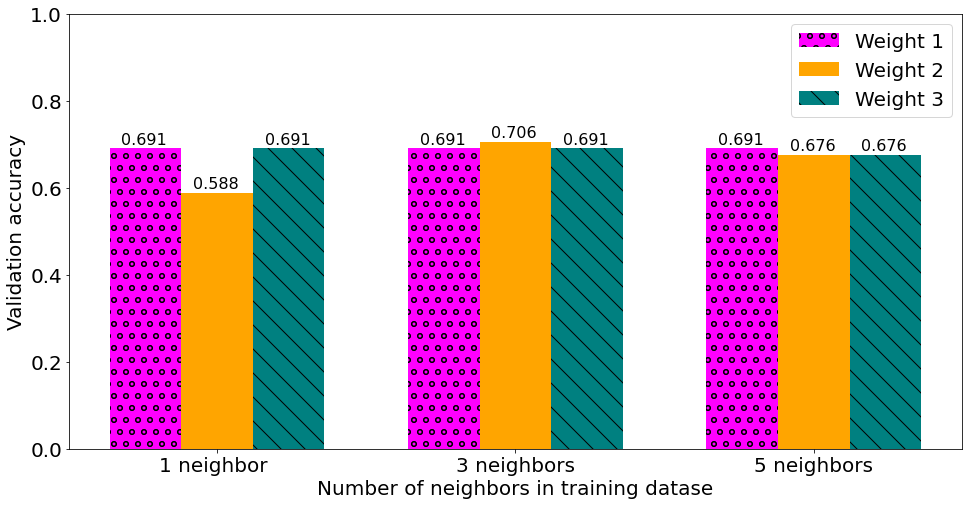

In [12]:
X_train, y_train, X_valid, y_valid = getData(110)

k1 = 1
k2 = 3
k3 = 5
accuary_50_1_1 = runKNN(k1, myWeight1, X_train, y_train, X_valid, y_valid)
accuary_50_1_2 = runKNN(k1, myWeight2, X_train, y_train, X_valid, y_valid)
accuary_50_1_3 = runKNN(k1, myWeight3, X_train, y_train, X_valid, y_valid)

accuary_50_2_1 = runKNN(k2, myWeight1, X_train, y_train, X_valid, y_valid)
accuary_50_2_2 = runKNN(k2, myWeight2, X_train, y_train, X_valid, y_valid)
accuary_50_2_3 = runKNN(k2, myWeight3, X_train, y_train, X_valid, y_valid)

accuary_50_3_1 = runKNN(k3, myWeight1, X_train, y_train, X_valid, y_valid)
accuary_50_3_2 = runKNN(k3, myWeight2, X_train, y_train, X_valid, y_valid)
accuary_50_3_3 = runKNN(k3, myWeight3, X_train, y_train, X_valid, y_valid)

objects = ('1 neighbor ', '3 neighbors', '5 neighbors')
y_pos = np.arange(len(objects))
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams['font.size'] = '20'

knn1 = [accuary_50_1_2, accuary_50_1_2, accuary_50_1_3]
knn4 = [accuary_50_2_1, accuary_50_2_2, accuary_50_2_3]
knn50 = [accuary_50_3_2, accuary_50_3_2, accuary_50_3_3]

for index, value in enumerate(knn1):
    plt.text(index - 0.32, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
for index, value in enumerate(knn4):
    plt.text(index - 0.08, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
for index, value in enumerate(knn50):
    plt.text(index + 0.16, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
# for index, value in enumerate(min_rewardVSs):
#     plt.text(index + 0.25, value + 0.1, str("{:.3f}".format(value)), fontsize=14)
#plt.bar(y_pos, performance, align='center', alpha=0.5)
bars_sigmoid = plt.bar(y_pos - 0.24, knn1, 0.24, label = 'Weight 1', color = 'magenta')
plt.bar(y_pos, knn4, 0.24, label = 'Weight 2', color = 'orange')
bars_linear = plt.bar(y_pos + 0.24, knn50, 0.24, label = 'Weight 3', color = 'teal')
#plt.bar(y_pos + 0.36, min_rewardVSs, 0.24, label = 'Lowest tolerance latency in a time slot compared to 5 VS')
plt.xticks(y_pos, objects)
plt.ylim([0, 1])
plt.ylabel("Validation accuracy")
plt.xlabel("Number of neighbors in training datase")
patterns = ("o", "o", "o")
for i, x in zip(bars_sigmoid,patterns):
      i.set_hatch(x)
patterns = ("\\", "\\", "\\")
for i, x in zip(bars_linear,patterns):
      i.set_hatch(x)
plt.legend(fontsize = 20)
#plt.margins(0.1,0)
plt.savefig('../pics/KNN/KNN_110_normal.svg', bbox_inches='tight')
plt.savefig('../pics/KNN/KNN_110_normal.pdf', bbox_inches='tight')
plt.show()

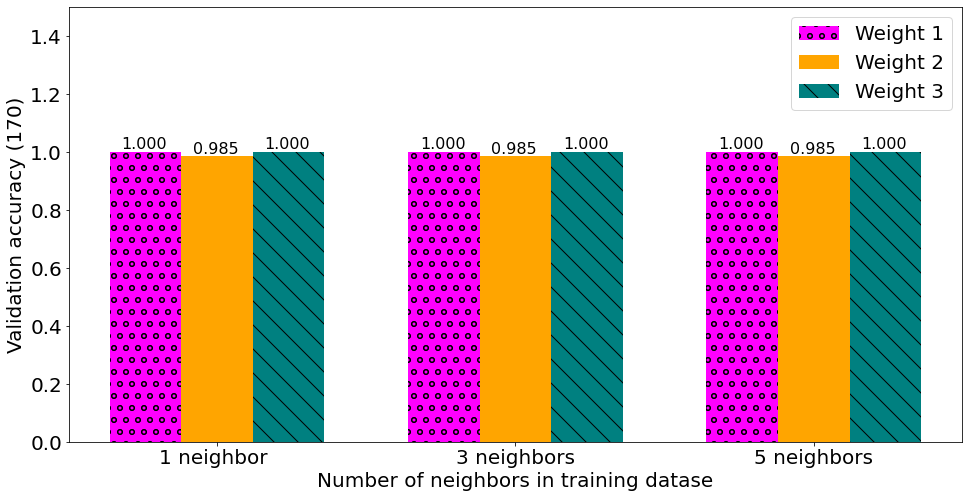

In [15]:
X_train, y_train, X_valid, y_valid = getDataNormalization(170)

k1 = 1
k2 = 3
k3 = 5
accuary_50_1_1 = runKNN(k1, myWeight1, X_train, y_train, X_valid, y_valid)
accuary_50_1_2 = runKNN(k1, myWeight2, X_train, y_train, X_valid, y_valid)
accuary_50_1_3 = runKNN(k1, myWeight3, X_train, y_train, X_valid, y_valid)

accuary_50_2_1 = runKNN(k2, myWeight1, X_train, y_train, X_valid, y_valid)
accuary_50_2_2 = runKNN(k2, myWeight2, X_train, y_train, X_valid, y_valid)
accuary_50_2_3 = runKNN(k2, myWeight3, X_train, y_train, X_valid, y_valid)

accuary_50_3_1 = runKNN(k3, myWeight1, X_train, y_train, X_valid, y_valid)
accuary_50_3_2 = runKNN(k3, myWeight2, X_train, y_train, X_valid, y_valid)
accuary_50_3_3 = runKNN(k3, myWeight3, X_train, y_train, X_valid, y_valid)

objects = ('1 neighbor ', '3 neighbors', '5 neighbors')
y_pos = np.arange(len(objects))
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams['font.size'] = '20'

knn1 = [accuary_50_1_2, accuary_50_1_2, accuary_50_1_3]
knn4 = [accuary_50_2_1, accuary_50_2_2, accuary_50_2_3]
knn50 = [accuary_50_3_2, accuary_50_3_2, accuary_50_3_3]

for index, value in enumerate(knn1):
    plt.text(index - 0.32, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
for index, value in enumerate(knn4):
    plt.text(index - 0.08, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
for index, value in enumerate(knn50):
    plt.text(index + 0.16, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
# for index, value in enumerate(min_rewardVSs):
#     plt.text(index + 0.25, value + 0.1, str("{:.3f}".format(value)), fontsize=14)
#plt.bar(y_pos, performance, align='center', alpha=0.5)
bars_sigmoid = plt.bar(y_pos - 0.24, knn1, 0.24, label = 'Weight 1', color = 'magenta')
plt.bar(y_pos, knn4, 0.24, label = 'Weight 2', color = 'orange')
bars_linear = plt.bar(y_pos + 0.24, knn50, 0.24, label = 'Weight 3', color = 'teal')
#plt.bar(y_pos + 0.36, min_rewardVSs, 0.24, label = 'Lowest tolerance latency in a time slot compared to 5 VS')
plt.xticks(y_pos, objects)
plt.ylim([0, 1.5])
plt.ylabel("Validation accuracy (170)")
plt.xlabel("Number of neighbors in training datase")
patterns = ("o", "o", "o")
for i, x in zip(bars_sigmoid,patterns):
      i.set_hatch(x)
patterns = ("\\", "\\", "\\")
for i, x in zip(bars_linear,patterns):
      i.set_hatch(x)
plt.legend(fontsize = 20)
#plt.margins(0.1,0)
plt.savefig('../pics/KNN/KNN_170_validation.svg', bbox_inches='tight')
plt.savefig('../pics/KNN/KNN_170_validation.pdf', bbox_inches='tight')
plt.show()

In [18]:
test_size = [50, 110, 170]
for length in test_size:
    X_train, y_train, X_valid, y_valid = getDataNormalization(length)
    X_test, y_test = getTestDataset(110)
    accuary = runKNN(3, myWeight1, X_train, y_train, X_test, y_test)
    print("accuary with ", length, "samples:", accuary)

accuary with  50 samples: 0.9711538461538461
accuary with  110 samples: 0.9711538461538461
accuary with  170 samples: 1.0
